<a href="https://colab.research.google.com/github/arooba-zaman1211/Deep_Learning_using_Pytorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
from nltk.corpus import stopwords
import re
import unidecode
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/train.csv')

In [4]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
test.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
train[['question1','question2']]=train[['question1','question2']].astype(str)
test[['question1','question2']]=test[['question1','question2']].astype(str)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404290 non-null  object
 4   question2     404290 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


<Axes: >

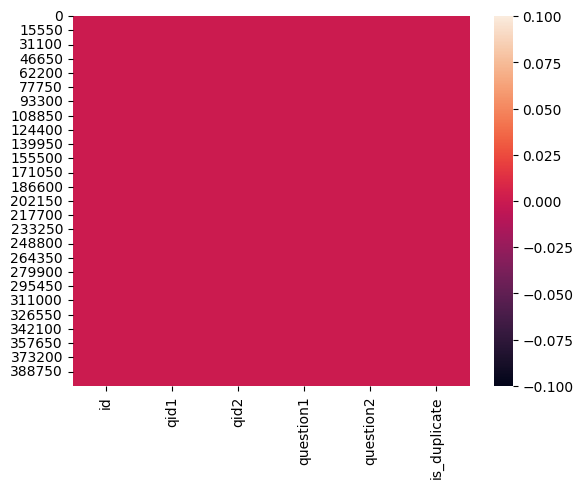

In [8]:
sns.heatmap(train.isnull())

In [9]:
def case_convert():
    train.question1 = [i.lower() for i in train.question1 ]
    train.question2= [i.lower() for i in train.question2 ]
    test.question1 = [i.lower() for i in test.question1 ]
    test.question2 = [i.lower() for i in test.question2 ]

def remove_specials():
        train.question1= [re.sub(r"[^a-zA-Z]"," ",text) for text in train.question1]
        train.question2= [re.sub(r"[^a-zA-Z]"," ",text) for text in train.question2]
        test.question1 = [re.sub(r"[^a-zA-Z]"," ",text) for text in test.question1]
        test.question2 = [re.sub(r"[^a-zA-Z]"," ",text) for text in test.question2]

def remove_shorthands():
    CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in train.question1:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    train.question1 = texts
    texts.clear()
    for text in train.question2:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    train.question2 = texts
    texts.clear()
    for text in test.question1:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    test.question1 = texts
    texts.clear()
    for text in test.question2:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
              string = string + " " + word
        texts.append(string.strip())
    test.question2 = texts
def remove_stopwords():
      texts = []
      stopwords_list = stopwords.words('english')
      for item in train.question1:
          string = ""
          for word in item.split(" "):
              if word.strip() in stopwords_list:
                  continue
              else:
                  string = string + " " + word
          texts.append(string)
      train.question1 = texts
      texts.clear()
      for item in train.question2:
          string = ""
          for word in item.split(" "):
              if word.strip() in stopwords_list:
                  continue
              else:
                  string = string + " " + word
          texts.append(string)
      train.question2 = texts
      texts.clear()
      for item in test.question1:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
      test.question1 = texts
      texts.clear()
      for item in test.question2:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
      test.question2 = texts
def remove_accents():

    train.question1=[unidecode.unidecode(text) for text in train.question1 ]
    train.question2= [unidecode.unidecode(text) for text in train.question2]
    test.question1 = [unidecode.unidecode(text) for text in test.question1]
    test.question2 = [unidecode.unidecode(text) for text in test.question2]
def normalize_spaces():

    train.question1=[re.sub(r"\s+"," ",text) for text in train.question1 ]
    train.question2= [re.sub(r"\s+"," ",text) for text in train.question2]
    test.question1 = [re.sub(r"\s+"," ",text) for text in test.question1]
    test.question2 = [re.sub(r"\s+"," ",text) for text in test.question2]


case_convert()
remove_shorthands()
remove_accents()
remove_specials()
remove_stopwords()
normalize_spaces()


In [10]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,step step guide invest share market india,step step guide invest share market,0
1,1,3,4,story kohinoor koh noor diamond,would happen indian government stole kohinoor...,0
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0
3,3,7,8,mentally lonely solve,find remainder math math divided,0
4,4,9,10,one dissolve water quikly sugar salt methane ...,fish would survive salt water,0


In [11]:
#word len
train['q1_len']=train['question1'].str.len()
train['q2_len']=train['question2'].str.len()

#word count
train['q1_word']=train['question1'].apply(lambda x: len(x.split(" ")))
train['q2_word']=train['question2'].apply(lambda x: len(x.split(" ")))


#common words

train['s1']=train['question1'].apply(lambda x: x.split(" "))
train['s2']=train['question1'].apply(lambda x: x.split(" "))
train['common_words']= [len(set(a) & set(b)) for a, b in zip(train.s1, train.s2)]
train.drop(['s1','s2'],axis=1,inplace=True)

#common words share

train['word_share_q1']=round(train['common_words']/train['q1_word'],2)
train['word_share_q2']=round(train['common_words']/train['q2_word'],2)

In [12]:
x=train.drop(['is_duplicate'],axis=1)
y=train['is_duplicate']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train.drop('is_duplicate',axis=1),
                                                    train['is_duplicate'],
                                                    test_size=0.33,
                                                    random_state=41
                                                    )



In [14]:
print(x_train.shape,"'''''''",x_test.shape,"''''''''''''",y_test.shape,"''''''''",y_train.shape)

(270874, 12) ''''''' (133416, 12) '''''''''''' (133416,) '''''''' (270874,)


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_vocab_size=2000
tokenizer=Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train['question1'])
train1=tokenizer.texts_to_sequences(x_train['question1'])
tokenizer.fit_on_texts(x_test['question1'])
test1=tokenizer.texts_to_sequences(x_test['question1'])

tokenizer2=Tokenizer(num_words=max_vocab_size)
tokenizer2.fit_on_texts(x_train['question2'])
train2=tokenizer2.texts_to_sequences(x_train['question2'])
tokenizer2.fit_on_texts(x_test['question2'])
test2=tokenizer2.texts_to_sequences(x_test['question2'])

In [16]:
word2idx=tokenizer.word_index
V=len(word2idx)

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train1_pad = pad_sequences(train1)
test1_pad=pad_sequences(test1)
train2_pad = pad_sequences(train2)
test2_pad=pad_sequences(test2)

In [18]:
dtrain=np.hstack((train1_pad,train2_pad))
dtest=np.hstack((test1_pad,test2_pad))
dtest=pad_sequences(dtest,maxlen=116)

In [19]:
dtest.shape

(133416, 116)

In [20]:
T=dtrain.shape[1]
word2idx=tokenizer.word_index
V=len(word2idx)
D=20

In [21]:
from keras.models import Model
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Activation, BatchNormalization,Input,Embedding, GlobalMaxPooling1D

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(4)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(4)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(dtrain,y_train,
          epochs=5,
          validation_data=(dtest,y_test)

         )
model.summary()

Epoch 1/5
8465/8465 ━━━━━━━━━━━━━━━━━━━━ 192s 22ms/step - accuracy: 0.6929 - loss: 0.5824 - val_accuracy: 0.6347 - val_loss: 0.6712
Epoch 2/5
8465/8465 ━━━━━━━━━━━━━━━━━━━━ 186s 22ms/step - accuracy: 0.7409 - loss: 0.5240 - val_accuracy: 0.6322 - val_loss: 0.6845
Epoch 3/5
8465/8465 ━━━━━━━━━━━━━━━━━━━━ 209s 23ms/step - accuracy: 0.7561 - loss: 0.5016 - val_accuracy: 0.6302 - val_loss: 0.6920
Epoch 4/5
8465/8465 ━━━━━━━━━━━━━━━━━━━━ 186s 22ms/step - accuracy: 0.7667 - loss: 0.4844 - val_accuracy: 0.6347 - val_loss: 0.7234
Epoch 5/5
8465/8465 ━━━━━━━━━━━━━━━━━━━━ 194s 23ms/step - accuracy: 0.7749 - loss: 0.4708 - val_accuracy: 0.6240 - val_loss: 0.7332


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 116)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 116, 20)             │       1,266,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 114, 32)             │           1,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 28, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 26, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 4, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,897,701 (14.87 MB)

 Trainable params: 1,299,233 (4.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,598,468 (9.91 MB)